In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as pg
import plotly.express as px 

In [2]:
#prepare the data frame
file = 'COVID-19 Coronavirus'
pth = r'C:\Users\Junyu Mou\Desktop\File\BU\4st-SPRING 2022\CS 677\TermProject'
file_path = os.path.join(pth, file + '.csv')

with open (file_path) as f:
    lines = f.read().splitlines() 
    print("open file: " + file + ".csv")

df_ori = [] 
for i in lines[1:]:
    df_ori.append(i.split(','))

df_ori = pd.DataFrame(df_ori)


open file: COVID-19 Coronavirus.csv


In [3]:
#prepare the data 
df = df_ori[[0,1,2,3,4,5,6,7,8,9,10]]
df.columns = ['Country','other_name','country_code','population','continent',
             'total_case','total_death','Tot_Cases_per_1M_pop','Tot_Deaths_1M_pop','Death_percentage','developed']


In [4]:
df

,Country,other_name,country_code,population,continent,total_case,total_death,Tot_Cases_per_1M_pop,Tot_Deaths_1M_pop,Death_percentage,developed
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743132,0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275057509,0
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587215976,0
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382270638,0
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438434,0
...,...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.54185022,0
221,Western Sahara,Western Sahara,ESH,623031,Africa,10,1,16,2,10,0
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.15178723,0
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251119605,0


In [5]:
#remove missing data 
df.dropna(inplace=True)
df.isnull().sum() #no missing data 

Country                 0
other_name              0
country_code            0
population              0
continent               0
total_case              0
total_death             0
Tot_Cases_per_1M_pop    0
Tot_Deaths_1M_pop       0
Death_percentage        0
developed               0
dtype: int64

In [6]:
#modify the data type
df[['population','total_case','total_death','Tot_Cases_per_1M_pop','Tot_Deaths_1M_pop','Death_percentage']] = df[['population','total_case','total_death','Tot_Cases_per_1M_pop','Tot_Deaths_1M_pop','Death_percentage']].astype(float)
df = df[['Country','country_code','population','continent',
             'total_case','total_death','Tot_Cases_per_1M_pop','Tot_Deaths_1M_pop','Death_percentage','developed']]

In [7]:
#explory data analysis
"""
Questions: 
 - the world's total cases distribution 
 - the world's total death distribution 
 - the world death rate distribution 
 - total cases comparsion amoung continent 
 - total death comparsion amoung continent 
 - coninent's number of countries distribution 
"""


"\nQuestions: \n - the world's total cases distribution \n - the world's total death distribution \n - the world death rate distribution \n - total cases comparsion amoung continent \n - total death comparsion amoung continent \n - coninent's number of countries distribution \n"

In [33]:
#world's total cases distribution 
fig = pg.Figure(data=pg.Choropleth(
    locations = df['country_code'],
    z = df['total_case'],
    colorscale = 'burgyl',
    reversescale=False,
    marker_line_width=0.2,
    colorbar_title = 'COVID 19 cases in Millions',
))
fig.update_layout(
    title_text= 'World total cases distribution',
    title_x = 0.3,
    geo=dict(showframe=True,
        showcoastlines=False,
        projection_type='natural earth'
    ))
fig.show()

In [9]:
#world's total death distribution 
fig = pg.Figure(data=pg.Choropleth(
    locations = df['country_code'],
    z = df['total_death'],
    colorscale = 'gray',
    reversescale=True,
    marker_line_width=0.2,
    colorbar_title = 'COVID 19 death in Millions',
))
fig.update_layout(
    title_text= 'World total death distribution',
    title_x = 0.3,
    geo=dict(showframe=True,
        showcoastlines=False,
        projection_type='natural earth'
    ))
fig.show()

In [10]:
#world's death rate 
fig = pg.Figure(data=pg.Choropleth(
    locations = df['country_code'],
    z = df['Death_percentage'],
    colorscale = 'tempo',
    reversescale=False,
    marker_line_width=0.2,
    colorbar_title = 'COVID 19 death rate (%)',
))
fig.update_layout(
    title_text= 'World death rate',
    title_x = 0.5,
    geo=dict(showframe=True,
        showcoastlines=False,
        projection_type='natural earth'
    ))
fig.show()

In [11]:
#total data for each continent
tmp = df[['Tot_Cases_per_1M_pop','Tot_Deaths_1M_pop']].groupby(df['continent']).sum()
tmp

,Tot_Cases_per_1M_pop,Tot_Deaths_1M_pop
continent,,
Africa,1782060.0,17843.0
Asia,5015344.0,30847.0
Europe,14596188.0,110071.0
Latin America and the Caribbean,6943019.0,75380.0
Northern America,1090035.0,6611.0
Oceania,1375938.0,6009.0


In [12]:
#continent's number of countris 
cont_dis = df['continent'].groupby(df['continent']).count()
cont_dis

continent
Africa                             58
Asia                               49
Europe                             48
Latin America and the Caribbean    48
Northern America                    5
Oceania                            17
Name: continent, dtype: int64

<BarContainer object of 6 artists>

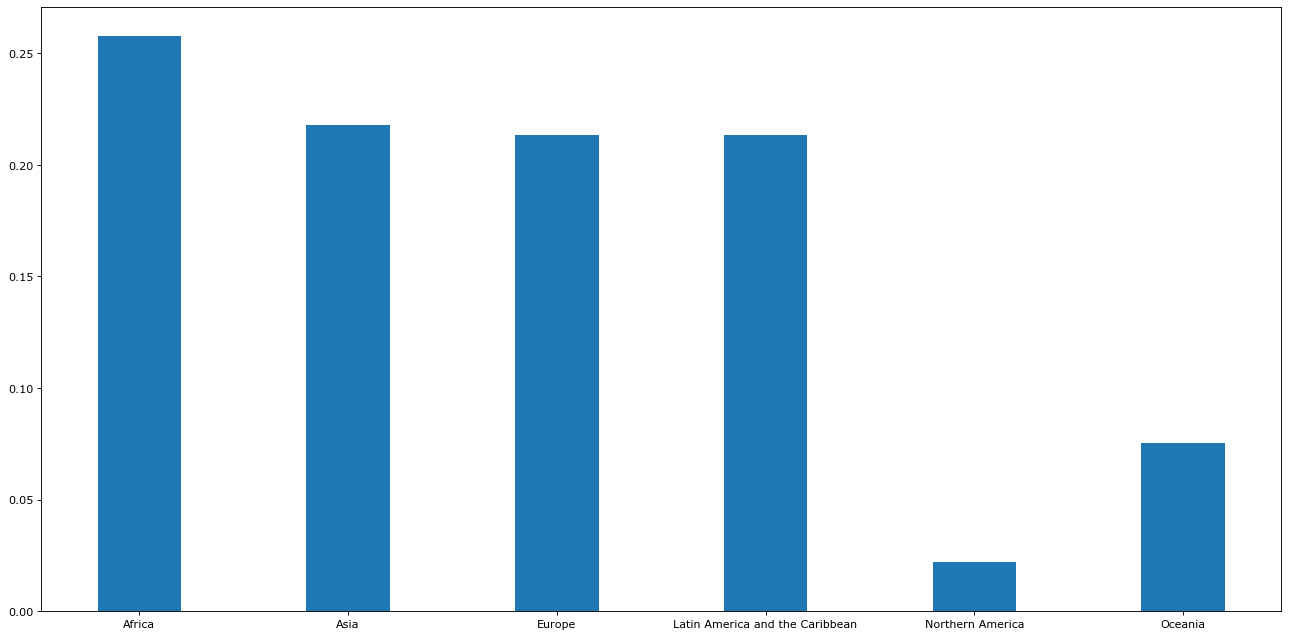

In [13]:
#sample distribution
plt.figure(figsize=(20, 10), dpi=80)
plt.bar(list(cont_dis.index), cont_dis/len(df), 0.4)

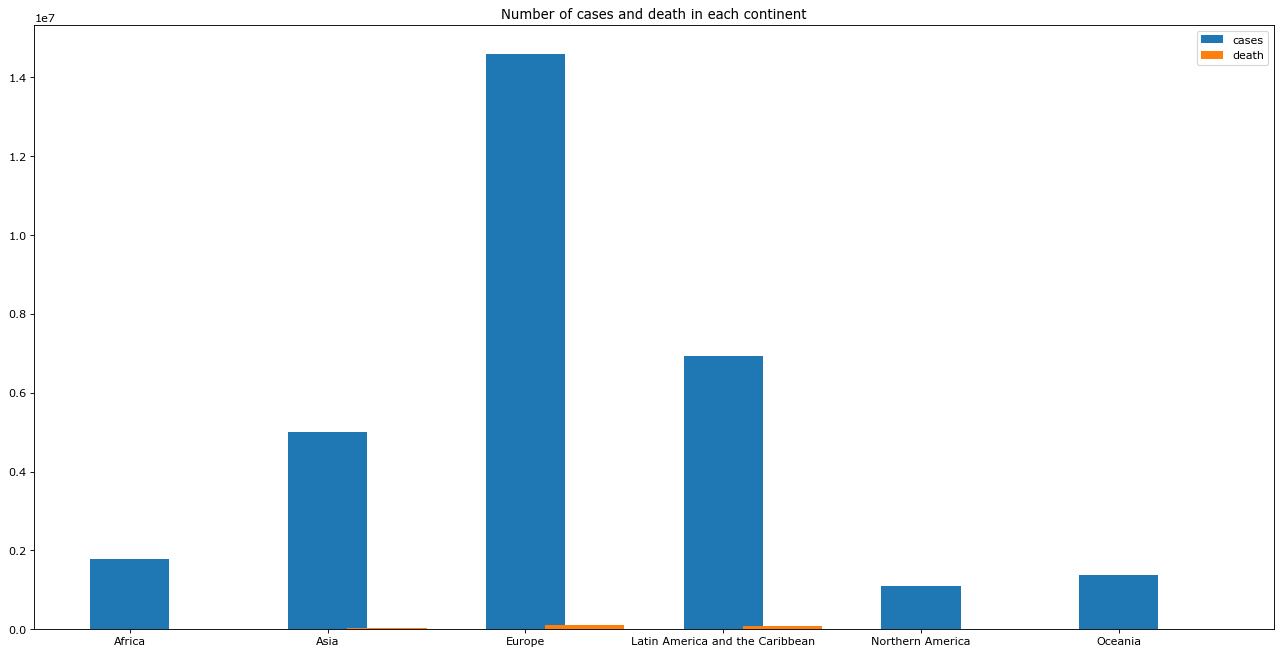

In [14]:
x = tmp.index
y1 = tmp['Tot_Cases_per_1M_pop']
y2 = tmp['Tot_Deaths_1M_pop']

#total cases and total death
x_axis = np.arange(len(x))
plt.figure(figsize=(20, 10), dpi=80)
plt.bar(x_axis, y1, 0.4, label = 'cases')
plt.bar(x_axis + 0.3, y2, 0.4, label = 'death')
plt.xticks(x_axis, x)
plt.title("Number of cases and death in each continent")
plt.legend()
plt.show()

In [15]:
#manually sign the developed countries and developed countries by 
#www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf

In [15]:
df_ml = df[['population','total_case','total_death']]
df_ml['label'] = df['developed']

C:\conda_temp/ipykernel_27252/11893629.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'label distribution')

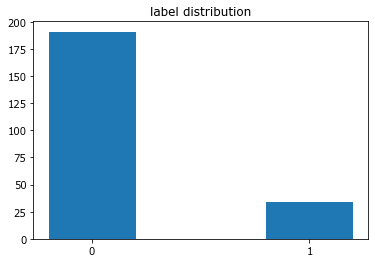

In [16]:
#label distribution 
cunt_lab = df_ml['label'].groupby(df_ml['label']).count()
plt.bar(['0','1'], cunt_lab, 0.4)
plt.title("label distribution")

In [17]:
#import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from dtreeviz.trees import dtreeviz
from imblearn.over_sampling import RandomOverSampler
#data 
features = ['population','total_case','total_death']
x = df_ml[features]
y = df_ml['label']
#oversampling the data 
oversample = RandomOverSampler(sampling_strategy='minority',random_state=101)
x, y = oversample.fit_resample(x,y)

Text(0.5, 1.0, 'label distribution')

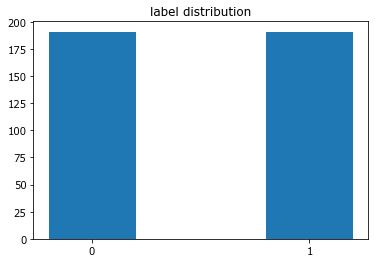

In [18]:
#distribution after resampling 
after = [y[y=='0'].count(), y[y=='1'].count()]
plt.bar(['0','1'], after, 0.4)
plt.title("label distribution")

prediction accuracy(Bayesian) : 0.59


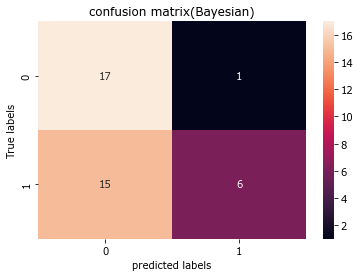

In [19]:
#Naive Bayesian 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1001)
le = LabelEncoder()
y_train = le.fit_transform (y_train)
y_test = le.fit_transform (y_test)
NB_classifier = GaussianNB(). fit(x_train,y_train)
prediction_NB = NB_classifier. predict(x_test)
accuracy_NB = np.mean ( prediction_NB == y_test )

#confusion matrix and accuracy  
cm_NB = cm(y_test, prediction_NB)
ax1 = plt.subplot()
sns.heatmap(cm_NB, annot = True, 
            fmt='g',ax=ax1)

ax1.set_xlabel("predicted labels")
ax1.set_ylabel("True labels")
ax1.set_title("confusion matrix(Bayesian)")
print ('prediction accuracy(Bayesian) : ' + str (round(accuracy_NB,2)))

prediction accuracy(Logistic regression) : 0.83


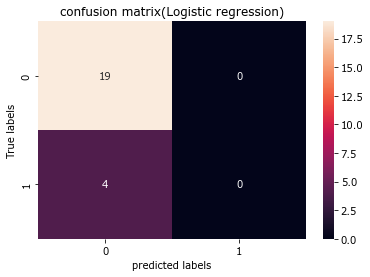

In [20]:
#logistic regression 
features = ['population','total_case','total_death']
x = df_ml[features]
y = df_ml['label']
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1002)

log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(x_train,y_train)
predict_log = log_reg_classifier.predict(x_test)
accuracy_log = np.mean ( predict_log == y_test )

#confusion matrix and accuracy  
cm_log = cm(y_test, predict_log)
ax1 = plt.subplot()
sns.heatmap(cm_log, annot = True, 
            fmt='g',ax=ax1)

ax1.set_xlabel("predicted labels")
ax1.set_ylabel("True labels")
ax1.set_title("confusion matrix(Logistic regression)")
print ('prediction accuracy(Logistic regression) : ' + str (round(accuracy_log,2)))



'\nthe optimal K is 4 \n'

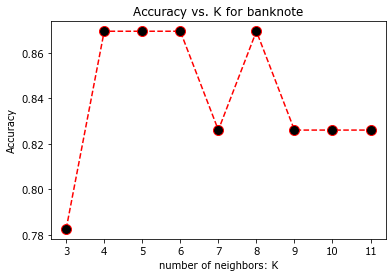

In [21]:
#KNN 
accuracy = [] 
features = ['population','total_case','total_death']
x = df_ml[features]
y = df_ml['label']
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1003)
#find the best k 
for i in range(3,12):
    knn_classifier = KNeighborsClassifier(n_neighbors = i) 
    knn_classifier.fit(x_train,y_train)
    pred_k = knn_classifier.predict(x_test)
    accuracy.append(np.mean(pred_k == y_test))
###plot the graph
plt.plot([3,4,5,6,7,8,9,10,11],accuracy, color="red",linestyle='dashed', marker ='o', 
         markerfacecolor='black',markersize=10)
plt.title("Accuracy vs. K for banknote")
plt.xlabel("number of neighbors: K")
plt.ylabel("Accuracy")

"""
the optimal K is 4 
"""

prediction accuracy(KNN:k=4) : 0.87


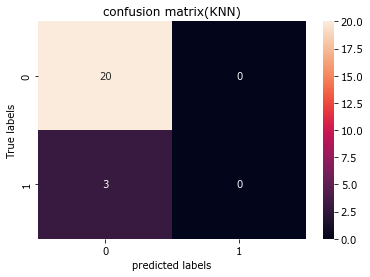

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4) 
knn_classifier.fit(x_train,y_train)
pred_knn = knn_classifier.predict(x_test)
accuracy_knn = np.mean(pred_knn == y_test)

#confusion matrix and accuracy  
cm_knn = cm(y_test, pred_knn)
ax1 = plt.subplot()
sns.heatmap(cm_knn, annot = True, 
            fmt='g',ax=ax1)

ax1.set_xlabel("predicted labels")
ax1.set_ylabel("True labels")
ax1.set_title("confusion matrix(KNN)")
print ('prediction accuracy(KNN:k=4) : ' + str (round(accuracy_knn,2)))


In [23]:
"""
Suppose there is a country with 25653599 as population, 250000 total cases, and 5000 total death 
is it a developiing country or developed country? 
"""
prediction_example = knn_classifier. predict(np.array([25653599,250000,5000]).reshape(1,-1))
prediction_example #developing country

array(['0'], dtype=object)

prediction accuracy(Decision Tree) : 0.65


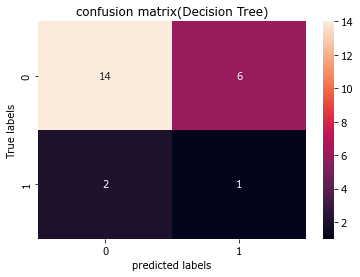

In [30]:
#tree 
features = ['population','total_case','total_death']
x = df_ml[features]
y = df_ml['label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1004)

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf .fit(x_train,y_train)
pred_tree = clf.predict (x_test)
accuracy_tree = np.mean(pred_tree == y_test)
#confusion matrix and accuracy  
cm_tree = cm(y_test, pred_tree)
ax1 = plt.subplot()
sns.heatmap(cm_tree, annot = True, 
            fmt='g',ax=ax1)

ax1.set_xlabel("predicted labels")
ax1.set_ylabel("True labels")
ax1.set_title("confusion matrix(Decision Tree)")
print ('prediction accuracy(Decision Tree) : ' + str (round(accuracy_tree,2)))


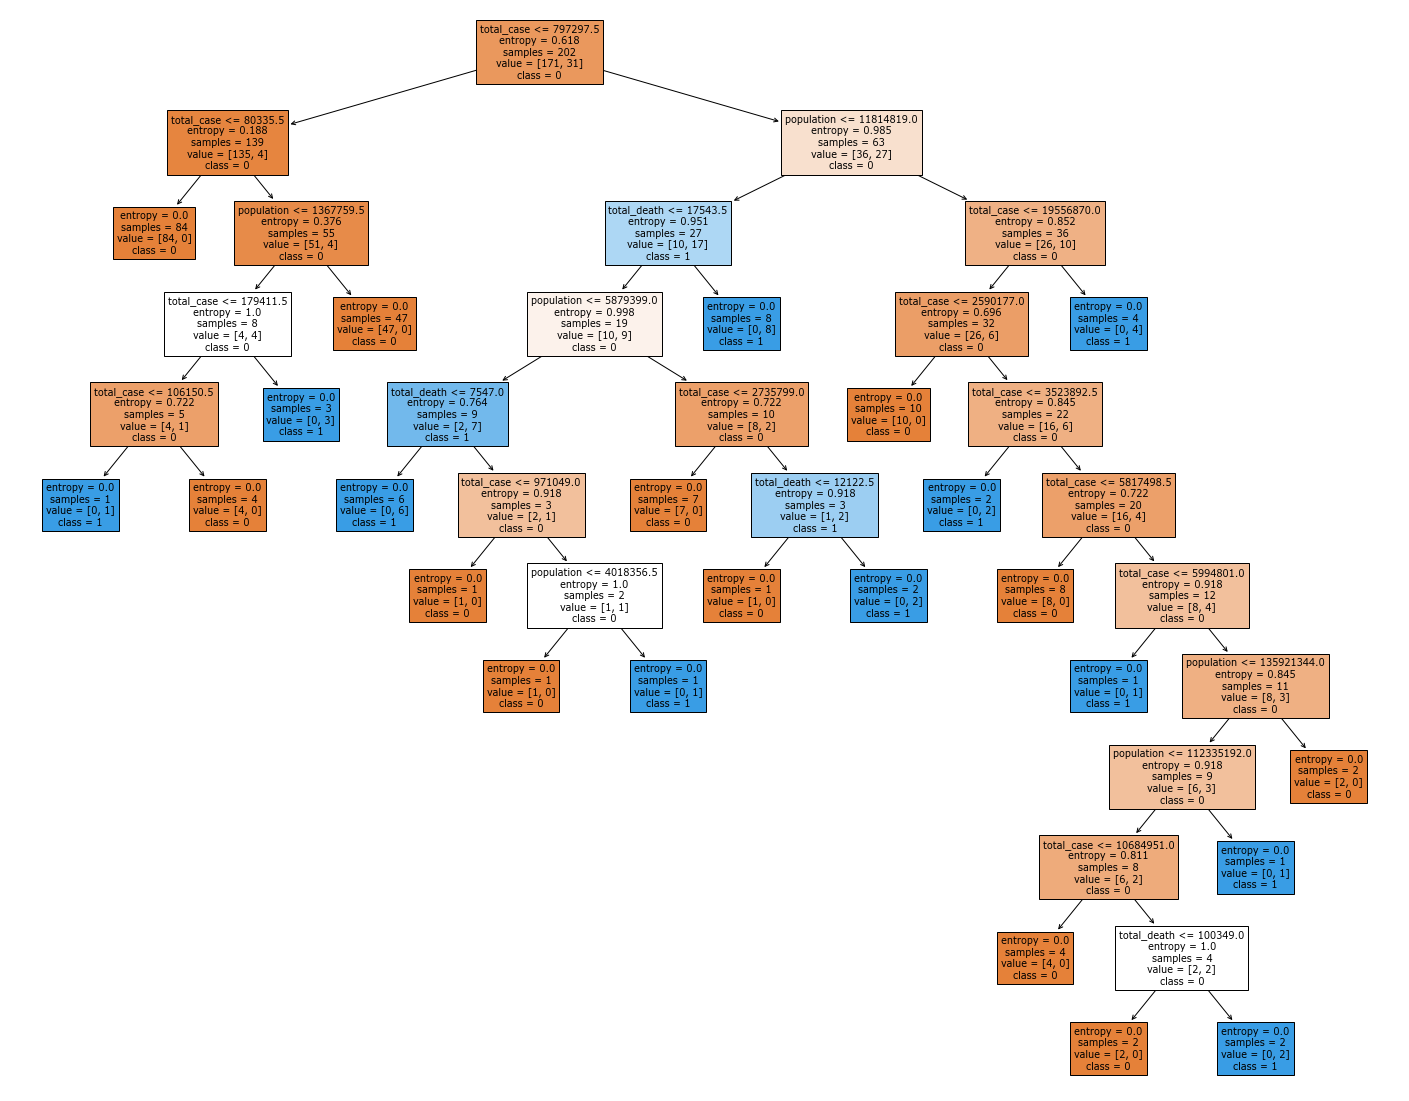

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=['0','1'],
                   filled=True)